### Project: Heart Disease Prediction using TensorFlow

**Objective** : To predict whether the patient has heart disease or not <br>
**Dataset used** : **[Heart disease dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)**

#### About the dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them (13 features and 1 label). The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime


In [2]:
data = pd.read_csv('data/heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset information:

| #   | Features                                                     |
| --- | ------------------------------------------------------------ |
| 1   | age                                                          |
| 2   | sex                                                          |
| 3   | cp (chest pain type 4 values)                                |
| 4   | trestbps (resting blood pressure)                            |
| 5   | chol (serum cholestrol)                                      |
| 6   | fbs (fasting blood sugar > 120 mg/dl)                        |
| 7   | restecg (resting electrocardiographic results(values 0,1,2)) |
| 8   | thalach (maximum heart rate achieved)                        |
| 9   | exang (exercise induced angina)                              |
| 10  | oldpeak (ST depression induced by exercise relative to rest) |
| 11  | slope (the slope of the peak exercise ST segment)            |
| 12  | ca (number of major vessels (0-3) colored by flourosopy)     |
| 13  | thal (0 = normal; 1 = fixed defect; 2 = reversable defect)   |

Labels: target


In [3]:
data['target'].unique()


array([1, 0], dtype=int64)

If the patient has disease, it is denoted as '1' and if the patient has no disease, it is denoted as '0'


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Features and labels


In [5]:
labels = data['target']
features = data.drop('target', axis=1)
print("Heart Disease dataset has {} data points with {} variables each.".format(*data.shape))


Heart Disease dataset has 303 data points with 14 variables each.


In [6]:
print('===================Features===================')
print(features.head())
print('===================Labels===================')
print(labels.head())


===================Features===================
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
===================Labels===================
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Train-Test Split


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=12345)


### Feature Scaling (Standardization)


In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Create Sequential Model


In [29]:
# Input shape
nIn = X_test.shape[1]

# Out shape = number of classes
nClass = len(np.unique(y_test))
nClass

2

In [12]:
inputs = keras.Input(shape=(nIn,))

model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(nIn,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(nClass, activation='softmax'))


c:\Users\DELL\.conda\envs\pyenv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Summary of the model


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,658 (14.29 KB)

 Trainable params: 3,658 (14.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compile model


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Early Stopping


In [15]:
es = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)


### Training the Model


In [16]:
# Model training
BATCH_SIZE = 16
EPOCHS = 50
history = model.fit(X_train, y_train, validation_data=(
    X_test, y_test), batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[es])


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4669 - loss: 0.8038 - val_accuracy: 0.6393 - val_loss: 0.6361
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5842 - loss: 0.6707 - val_accuracy: 0.7049 - val_loss: 0.5678
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6576 - loss: 0.6217 - val_accuracy: 0.7705 - val_loss: 0.5166
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7706 - loss: 0.5367 - val_accuracy: 0.7705 - val_loss: 0.4707
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8032 - loss: 0.4768 - val_accuracy: 0.7705 - val_loss: 0.4381
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 0.4587 - val_accuracy: 0.7869 - val_loss: 0.4281
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8123 - loss: 0.4049 - val_accuracy: 0.8197 - val_loss: 0.4081
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8254 - loss: 0.3824 - val_accuracy: 0.8197 - val_loss

### Model Evaluation


In [17]:
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8902 - loss: 0.2750 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.4203 


In [18]:
# Train accuracy score
print(f"Train Evaluation : { round(train_eval[1]*100,2)}%")

# Test accuracy score
print(f"Test Evaluation : { round(test_eval[1]*100,2)}%")


Train Evaluation : 88.02%
Test Evaluation : 85.25%


### Visualization of Train and Test Results


In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch_x = history.epoch


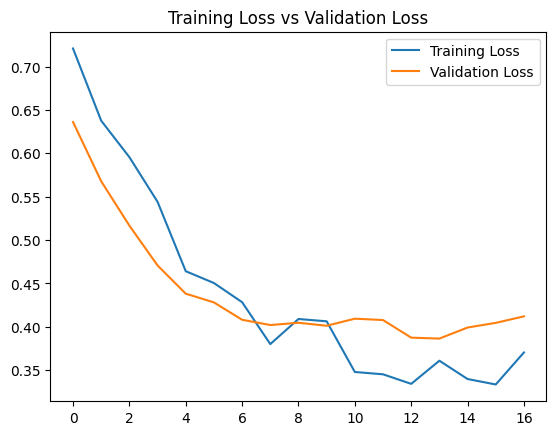

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(epoch_x, train_loss, label='Training Loss')
plt.plot(epoch_x, val_loss, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.figure()
plt.show()


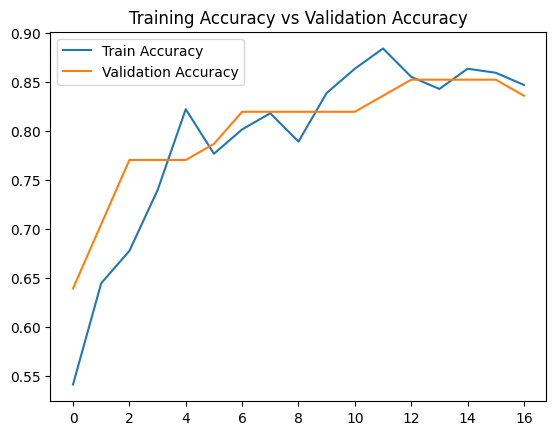

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(epoch_x, train_acc, label='Train Accuracy')
plt.plot(epoch_x, val_acc, label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

plt.show()


### Compare predictions with the actual label


In [28]:
predictions = np.argmax(model.predict(X_test), axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
label_vs_prediction = np.transpose(np.vstack((y_test, predictions)))
label_vs_prediction


array([[1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [26]:
predictions

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Confusion Matrix : \n {confusion_matrix(predictions,y_test)}")


Confusion Matrix : 
 [[21  5]
 [ 4 31]]


## Findings

We have built a FeedForward Neural Network which performs well with a Training accuracy of 93% and Test accuracy of 91%
